<a href="https://colab.research.google.com/github/sanyamChaudhary27/ML_models_from_scratch/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [22]:
class KNN:
    def __init__(self, k:int = 3, metric:str="euclidean", domain:str = "c"):
        self.k = k
        self.metric = metric
        self.domain = domain

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n, self.m = self.X.shape

    def predict(self, X):
        predictions = []
        for x_test in X:
            if self.metric == "euclidean":
                dists = np.sqrt(np.sum((self.X - x_test)**2, axis=1))
            elif self.metric == "manhattan":
                dists = np.sum(np.abs(self.X - x_test), axis=1)

            sorted_idx = np.argsort(dists)[:self.k]
            nearest_vals = self.y[sorted_idx]

            if self.domain == "c":
                predictions.append(Counter(nearest_vals).most_common(1)[0][0])
            elif self.domain == "r":
                predictions.append(np.mean(nearest_vals))
        return np.array(predictions)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_names'] = df_iris['target'].apply(lambda x: iris.target_names[x])


df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


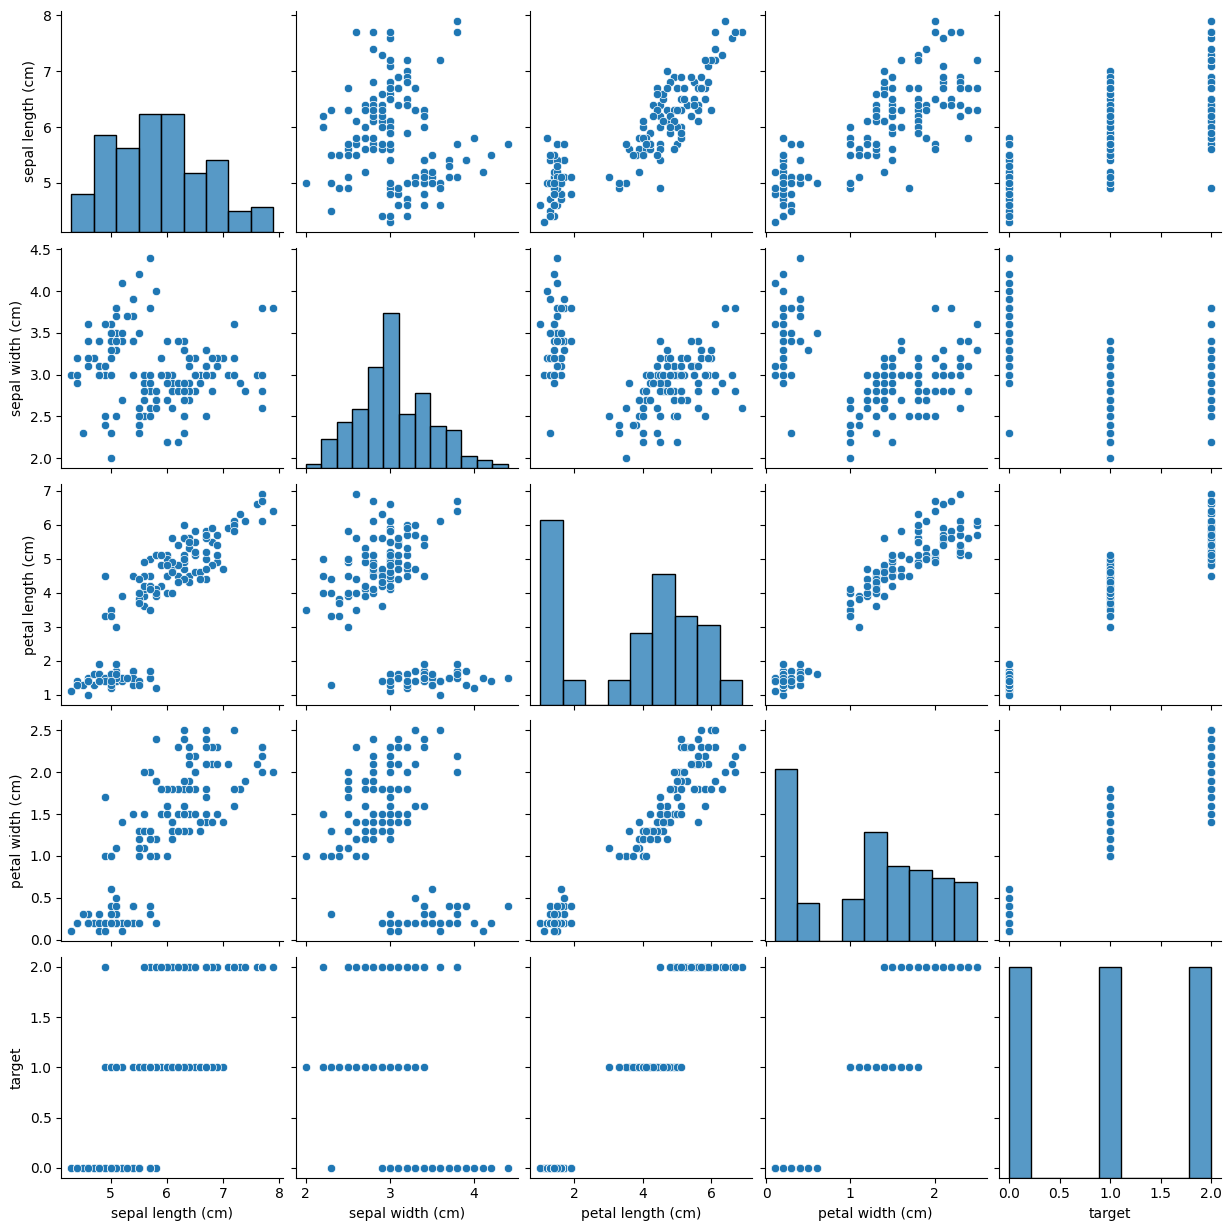

In [25]:
sns.pairplot(df_iris)

In [33]:
print("DataFrame Info:")
df_iris.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
print("Descriptive Statistics:")
print(df_iris.describe())

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [35]:
print("Missing Values:")
print(df_iris.isnull().sum())

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64


In [5]:
X_iris = df_iris[iris.feature_names].values
y_iris = df_iris['target'].values

In [9]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [12]:
scaled_df = Scaler.fit_transform(X_iris)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 42)

In [23]:
model = KNN()

In [24]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [26]:
from sklearn.metrics import accuracy_score

In [29]:
print(f"Accuracy on the test data: {accuracy_score(preds, y_test):.2%}")

Accuracy on the test data: 100.00%


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Conclusion

This notebook demonstrates the implementation and application of the **K-Nearest Neighbors (KNN)** algorithm for classification.( capable of regression too )

### Dataset Used

We utilized the famous **Iris dataset**, which is a classic dataset for machine learning. It contains 150 samples of iris flowers, each with four features (sepal length, sepal width, petal length, and petal width) and a target variable representing three species of iris (setosa, versicolor, and virginica).

### Model Performance

After training the custom KNN model on the Iris dataset and evaluating its performance on a test set, the model achieved an impressive **accuracy of 100.00%**.

This high accuracy suggests that the KNN algorithm is well-suited for this particular dataset, and the features provided are highly discriminative for classifying the different iris species.